# **Initial Setup**

## Insert scripts path

In [1]:
import sys
sys.path.insert(1,'d:\\DOCS\\my_workspace\\projects_git\\mp_nba_analysis\\data\\scripts')

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import joblib
from extract_functions import manage_data
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns',100)

# **Load API Data**

In [4]:
df = manage_data(filename='leaguedash',action='load')

In [5]:
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON
0,920,A.C. Green,1.610613e+09,DAL,33.0,6-9,81.0,225,Oregon State,USA,1985,1,23,83,597,656,69,-7.4,0.089,0.184,0.118,0.523,0.045,1996-97
1,761,Matt Geiger,1.610613e+09,CHH,27.0,7-1,85.0,245,Georgia Tech,USA,1992,2,42,49,437,258,38,1.2,0.106,0.158,0.210,0.538,0.065,1996-97
2,900,Matt Fish,1.610613e+09,MIA,27.0,6-11,83.0,235,North Carolina-Wilmington,USA,1992,2,50,6,2,5,0,-35.9,0.100,0.267,0.192,0.333,0.000,1996-97
3,672,Matt Bullard,1.610613e+09,HOU,30.0,6-10,82.0,235,Iowa,USA,Undrafted,Undrafted,Undrafted,71,320,117,67,0.8,0.014,0.101,0.147,0.535,0.099,1996-97
4,55,Marty Conlon,1.610613e+09,BOS,29.0,6-11,83.0,245,Providence,USA,Undrafted,Undrafted,Undrafted,74,574,323,104,-7.5,0.074,0.133,0.164,0.542,0.101,1996-97


In [6]:
df.shape

(12302, 24)

# **Data Wrangling**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12302 entries, 0 to 12301
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLAYER_ID             12302 non-null  int64  
 1   PLAYER_NAME           12301 non-null  object 
 2   TEAM_ID               12301 non-null  float64
 3   TEAM_ABBREVIATION     12301 non-null  object 
 4   AGE                   12301 non-null  float64
 5   PLAYER_HEIGHT         12230 non-null  object 
 6   PLAYER_HEIGHT_INCHES  12230 non-null  float64
 7   PLAYER_WEIGHT         12295 non-null  object 
 8   COLLEGE               12302 non-null  object 
 9   COUNTRY               12301 non-null  object 
 10  DRAFT_YEAR            12302 non-null  object 
 11  DRAFT_ROUND           12222 non-null  object 
 12  DRAFT_NUMBER          12214 non-null  object 
 13  GP                    12302 non-null  int64  
 14  PTS                   12302 non-null  int64  
 15  REB                

## Deal with null values

In [8]:
df.isnull().sum()

PLAYER_ID                0
PLAYER_NAME              1
TEAM_ID                  1
TEAM_ABBREVIATION        1
AGE                      1
PLAYER_HEIGHT           72
PLAYER_HEIGHT_INCHES    72
PLAYER_WEIGHT            7
COLLEGE                  0
COUNTRY                  1
DRAFT_YEAR               0
DRAFT_ROUND             80
DRAFT_NUMBER            88
GP                       0
PTS                      0
REB                      0
AST                      0
NET_RATING               0
OREB_PCT                 0
DREB_PCT                 0
USG_PCT                  0
TS_PCT                   0
AST_PCT                  0
SEASON                   0
dtype: int64

In [9]:
df[df.DRAFT_ROUND.isnull()].iloc[:,5:]

,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON
375,6-10,82.0,245,Georgia Tech,USA,1994,None,None,72,100,204,24,1.5,0.088,0.160,0.082,0.439,0.042,1996-97
401,6-7,79.0,240,Clemson,USA,1995,None,None,6,18,14,2,-41.5,0.100,0.211,0.252,0.319,0.071,1996-97
431,6-4,76.0,190,Washington,USA,1992,None,None,71,405,115,94,-1.3,0.031,0.067,0.165,0.539,0.141,1996-97
629,6-8,80.0,195,Kentucky,USA,1998,None,None,8,6,6,1,5.0,0.136,0.150,0.148,0.500,0.056,1997-98
817,6-10,82.0,245,Georgia Tech,USA,1994,None,None,28,58,69,9,-5.6,0.089,0.181,0.149,0.413,0.060,1997-98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,6-2,74.0,183,Princeton,USA,2019,None,None,5,50,6,10,-2.6,0.006,0.032,0.156,0.531,0.102,2021-22
11717,6-3,75.0,195,Houston,USA,2019,None,None,54,288,103,62,-3.8,0.021,0.097,0.159,0.483,0.105,2021-22
11743,6-2,74.0,174,Old Dominion,USA,2019,None,None,1,2,0,0,133.3,0.000,0.000,0.500,1.000,0.000,2021-22
11776,6-1,73.0,173,North Carolina State,USA,2016,None,None,3,0,3,3,34.6,0.091,0.286,0.219,0.000,0.200,2021-22


In [10]:
df[df.PLAYER_HEIGHT.isnull()]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON
179,199,Reggie Williams,1.610613e+09,NJN,33.0,None,NaN,None,Georgetown,USA,1987,1,4,13,76,31,10,-12.9,0.022,0.124,0.190,0.468,0.093,1996-97
882,1823,None,NaN,None,NaN,None,NaN,None,None,None,Undrafted,Undrafted,Undrafted,4,5,5,1,-8.8,0.100,0.111,0.115,0.434,0.050,1998-99
888,698,Eddie Johnson,1.610613e+09,HOU,40.0,None,NaN,,Illinois,USA,1981,2,29,3,12,2,1,-11.9,0.000,0.125,0.288,0.462,0.063,1998-99
1775,1564,Etdrick Bohannon,1.610613e+09,CLE,28.0,None,NaN,,Auburn-Montgomery,USA,Undrafted,Undrafted,Undrafted,6,8,7,0,13.5,0.176,0.222,0.156,0.694,0.000,2000-01
1781,202,Gary Grant,1.610613e+09,POR,36.0,None,NaN,,Michigan,USA,1988,1,15,4,10,0,1,3.7,0.000,0.000,0.179,0.714,0.100,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8155,202343,Elliot Williams,1.610613e+09,PHI,26.0,None,NaN,None,Memphis,USA,2010,1,22,13,37,8,12,5.5,0.000,0.065,0.162,0.477,0.150,2014-15
8172,202399,Jeff Adrien,1.610613e+09,HOU,29.0,None,NaN,None,Connecticut,USA,Undrafted,Undrafted,Undrafted,17,60,77,15,-1.6,0.091,0.244,0.134,0.494,0.104,2014-15
8184,203968,Jerrelle Benimon,1.610613e+09,DEN,23.0,None,NaN,None,Towson,USA,Undrafted,Undrafted,Undrafted,2,0,3,0,100.0,1.000,0.400,0.143,0.000,0.000,2014-15
8385,203565,Patrick Christopher,1.610613e+09,MEM,27.0,None,NaN,None,California,USA,Undrafted,Undrafted,Undrafted,4,6,6,0,-27.8,0.071,0.154,0.203,0.250,0.000,2014-15


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

PLAYER_ID               0
PLAYER_NAME             0
TEAM_ID                 0
TEAM_ABBREVIATION       0
AGE                     0
PLAYER_HEIGHT           0
PLAYER_HEIGHT_INCHES    0
PLAYER_WEIGHT           0
COLLEGE                 0
COUNTRY                 0
DRAFT_YEAR              0
DRAFT_ROUND             0
DRAFT_NUMBER            0
GP                      0
PTS                     0
REB                     0
AST                     0
NET_RATING              0
OREB_PCT                0
DREB_PCT                0
USG_PCT                 0
TS_PCT                  0
AST_PCT                 0
SEASON                  0
dtype: int64

## Change object-type columns with numbers to float

In [13]:
df.PLAYER_WEIGHT = df.PLAYER_WEIGHT.astype('float')
df.AGE = df.AGE.astype('int')

In [14]:
df.shape

(12144, 24)

In [15]:
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON
0,920,A.C. Green,1.610613e+09,DAL,33,6-9,81.0,225.0,Oregon State,USA,1985,1,23,83,597,656,69,-7.4,0.089,0.184,0.118,0.523,0.045,1996-97
1,761,Matt Geiger,1.610613e+09,CHH,27,7-1,85.0,245.0,Georgia Tech,USA,1992,2,42,49,437,258,38,1.2,0.106,0.158,0.210,0.538,0.065,1996-97
2,900,Matt Fish,1.610613e+09,MIA,27,6-11,83.0,235.0,North Carolina-Wilmington,USA,1992,2,50,6,2,5,0,-35.9,0.100,0.267,0.192,0.333,0.000,1996-97
3,672,Matt Bullard,1.610613e+09,HOU,30,6-10,82.0,235.0,Iowa,USA,Undrafted,Undrafted,Undrafted,71,320,117,67,0.8,0.014,0.101,0.147,0.535,0.099,1996-97
4,55,Marty Conlon,1.610613e+09,BOS,29,6-11,83.0,245.0,Providence,USA,Undrafted,Undrafted,Undrafted,74,574,323,104,-7.5,0.074,0.133,0.164,0.542,0.101,1996-97


In [16]:
df.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE',
       'PLAYER_HEIGHT', 'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 'COLLEGE',
       'COUNTRY', 'DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER', 'GP', 'PTS',
       'REB', 'AST', 'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT', 'TS_PCT',
       'AST_PCT', 'SEASON'],
      dtype='object')

## Drop unnecessary columns

In [17]:
df.drop(columns=['TEAM_ID','PLAYER_HEIGHT'], inplace=True)

In [18]:
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON
0,920,A.C. Green,DAL,33,81.0,225.0,Oregon State,USA,1985,1,23,83,597,656,69,-7.4,0.089,0.184,0.118,0.523,0.045,1996-97
1,761,Matt Geiger,CHH,27,85.0,245.0,Georgia Tech,USA,1992,2,42,49,437,258,38,1.2,0.106,0.158,0.210,0.538,0.065,1996-97
2,900,Matt Fish,MIA,27,83.0,235.0,North Carolina-Wilmington,USA,1992,2,50,6,2,5,0,-35.9,0.100,0.267,0.192,0.333,0.000,1996-97
3,672,Matt Bullard,HOU,30,82.0,235.0,Iowa,USA,Undrafted,Undrafted,Undrafted,71,320,117,67,0.8,0.014,0.101,0.147,0.535,0.099,1996-97
4,55,Marty Conlon,BOS,29,83.0,245.0,Providence,USA,Undrafted,Undrafted,Undrafted,74,574,323,104,-7.5,0.074,0.133,0.164,0.542,0.101,1996-97


## Change lenght and mass metrics 

In [19]:
# 1 in = 0.025 m
# 1 lb = 0.453 kg

df.PLAYER_HEIGHT_INCHES = df.PLAYER_HEIGHT_INCHES * 0.025
df.rename({'PLAYER_HEIGHT_INCHES':'PLAYER_HEIGHT_METERS'}, axis=1, inplace=True)

df.PLAYER_WEIGHT = df.PLAYER_WEIGHT * 0.453
df.rename({'PLAYER_WEIGHT':'PLAYER_WEIGHT_KG'}, axis=1, inplace=True)

In [20]:
df.loc[:,'PLAYER_HEIGHT_METERS':'PLAYER_WEIGHT_KG']

,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG
0,2.025,101.925
1,2.125,110.985
2,2.075,106.455
3,2.050,106.455
4,2.075,110.985
...,...,...
12297,1.975,89.241
12298,1.875,86.523
12299,1.950,97.395
12300,1.925,89.241


## Create a second dataframe with group by players

In [21]:
df.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE',
       'PLAYER_HEIGHT_METERS', 'PLAYER_WEIGHT_KG', 'COLLEGE', 'COUNTRY',
       'DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER', 'GP', 'PTS', 'REB', 'AST',
       'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT', 'TS_PCT', 'AST_PCT',
       'SEASON'],
      dtype='object')

In [22]:
df_above20GP = df.query('GP >= 20')

In [23]:
df_players_above20GP = df_above20GP[[
                'PLAYER_ID',
                'PLAYER_NAME',
                'PLAYER_HEIGHT_METERS',
                'PLAYER_WEIGHT_KG',
                'GP',
                'PTS',
                'REB',
                'AST',
                'NET_RATING',
                'OREB_PCT',
                'DREB_PCT',
                'USG_PCT',
                'TS_PCT',
                'AST_PCT']].groupby('PLAYER_ID').agg({
                'PLAYER_NAME':'first',
                'PLAYER_HEIGHT_METERS':'median',
                'PLAYER_WEIGHT_KG':'median',
                'GP':'median',
                'PTS':'median',
                'REB':'median',
                'AST':'median',
                'NET_RATING':'median',
                'OREB_PCT':'median',
                'DREB_PCT':'median',
                'USG_PCT':'median',
                'TS_PCT':'median',
                'AST_PCT':'median'
                })

In [24]:
df_players_above20GP.head()

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
PLAYER_ID,,,,,,,,,,,,,
2,Byron Scott,1.900,92.865,79.0,526.0,118.0,99.0,5.90,0.0150,0.0650,0.1500,0.5900,0.110
3,Grant Long,2.025,112.344,50.0,326.0,231.0,43.0,-2.40,0.0740,0.1320,0.1320,0.5100,0.078
7,Dan Schayes,2.075,117.780,59.5,269.5,183.5,29.0,0.05,0.0780,0.1430,0.1605,0.4720,0.052
9,Sedale Threatt,1.850,83.805,21.0,70.0,24.0,40.0,-4.50,0.0150,0.0560,0.1210,0.4510,0.185
15,Eric Piatkowski,1.975,97.395,66.0,557.0,148.0,61.5,-1.60,0.0285,0.0845,0.1710,0.5725,0.085


## Performance manipulation

In [25]:
df_players_above20GP.columns

Index(['PLAYER_NAME', 'PLAYER_HEIGHT_METERS', 'PLAYER_WEIGHT_KG', 'GP', 'PTS',
       'REB', 'AST', 'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT', 'TS_PCT',
       'AST_PCT'],
      dtype='object')

In [26]:
df_players_above20GP.columns[-9:]

Index(['PTS', 'REB', 'AST', 'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT',
       'TS_PCT', 'AST_PCT'],
      dtype='object')

In [27]:
df_players_above20GP.head()

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
PLAYER_ID,,,,,,,,,,,,,
2,Byron Scott,1.900,92.865,79.0,526.0,118.0,99.0,5.90,0.0150,0.0650,0.1500,0.5900,0.110
3,Grant Long,2.025,112.344,50.0,326.0,231.0,43.0,-2.40,0.0740,0.1320,0.1320,0.5100,0.078
7,Dan Schayes,2.075,117.780,59.5,269.5,183.5,29.0,0.05,0.0780,0.1430,0.1605,0.4720,0.052
9,Sedale Threatt,1.850,83.805,21.0,70.0,24.0,40.0,-4.50,0.0150,0.0560,0.1210,0.4510,0.185
15,Eric Piatkowski,1.975,97.395,66.0,557.0,148.0,61.5,-1.60,0.0285,0.0845,0.1710,0.5725,0.085


### Performance normalization

In [28]:
scaler = MinMaxScaler().set_output(transform='pandas')

In [29]:
df_players_norm_above20GP = scaler.fit_transform(df_players_above20GP.iloc[:,-9:])

In [30]:
type(df_players_norm_above20GP)

pandas.core.frame.DataFrame

In [31]:
df_players_norm_above20GP

,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
PLAYER_ID,,,,,,,,,
2,0.260979,0.108513,0.146018,0.794958,0.084270,0.121429,0.332248,0.646847,0.244444
3,0.160602,0.214219,0.063422,0.655462,0.415730,0.360714,0.273616,0.502703,0.173333
7,0.132246,0.169785,0.042773,0.696639,0.438202,0.400000,0.366450,0.434234,0.115556
9,0.032120,0.020580,0.058997,0.620168,0.084270,0.089286,0.237785,0.396396,0.411111
15,0.276537,0.136576,0.090708,0.668908,0.160112,0.191071,0.400651,0.615315,0.188889
...,...,...,...,...,...,...,...,...,...
1631216,0.060728,0.064546,0.026549,0.611765,0.247191,0.242857,0.185668,0.581982,0.111111
1631222,0.045169,0.053321,0.030973,0.586555,0.224719,0.264286,0.228013,0.545946,0.164444
1631223,0.140527,0.111319,0.044248,0.642017,0.191011,0.253571,0.368078,0.490090,0.113333


In [32]:
df_players_above20GP.iloc[:,:4]

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP
PLAYER_ID,,,,
2,Byron Scott,1.900,92.865,79.0
3,Grant Long,2.025,112.344,50.0
7,Dan Schayes,2.075,117.780,59.5
9,Sedale Threatt,1.850,83.805,21.0
15,Eric Piatkowski,1.975,97.395,66.0
...,...,...,...,...
1631216,Caleb Houstan,2.000,92.865,31.0
1631222,Jake LaRavia,1.975,106.455,29.0
1631223,David Roddy,1.900,115.515,45.0


In [33]:
df_players_norm_above20GP = pd.concat([df_players_above20GP.iloc[:,:4],df_players_norm_above20GP], axis=1)

In [34]:
df_players_norm_above20GP.head()

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
PLAYER_ID,,,,,,,,,,,,,
2,Byron Scott,1.900,92.865,79.0,0.260979,0.108513,0.146018,0.794958,0.084270,0.121429,0.332248,0.646847,0.244444
3,Grant Long,2.025,112.344,50.0,0.160602,0.214219,0.063422,0.655462,0.415730,0.360714,0.273616,0.502703,0.173333
7,Dan Schayes,2.075,117.780,59.5,0.132246,0.169785,0.042773,0.696639,0.438202,0.400000,0.366450,0.434234,0.115556
9,Sedale Threatt,1.850,83.805,21.0,0.032120,0.020580,0.058997,0.620168,0.084270,0.089286,0.237785,0.396396,0.411111
15,Eric Piatkowski,1.975,97.395,66.0,0.276537,0.136576,0.090708,0.668908,0.160112,0.191071,0.400651,0.615315,0.188889


### Performance aggregation

In [35]:
df_players_norm_above20GP.iloc[:,-9:].mean(axis=1)

PLAYER_ID
2          0.304412
3          0.313311
7          0.310654
9          0.216746
15         0.303196
             ...   
1631216    0.236933
1631222    0.238159
1631223    0.261577
1631260    0.245109
1631323    0.214781
Length: 1945, dtype: float64

In [36]:
# All stats - 'PTS', 'REB', 'AST', 'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT', 'TS_PCT', 'AST_PCT'
df_players_norm_above20GP['OVERALL_RATING'] = df_players_norm_above20GP.iloc[:,-9:].mean(axis=1)

# 'PTS', 'AST', 'NET_RATING', 'USG_PCT', 'TS_PCT', 'AST_PCT'
df_players_norm_above20GP['OVERALL_OFF'] = df_players_norm_above20GP[['PTS', 'AST', 'NET_RATING', 'USG_PCT', 'TS_PCT', 'AST_PCT']].mean(axis=1)

# 'REB', 'OREB_PCT', 'DREB_PCT'
df_players_norm_above20GP['OVERALL_DEF'] = df_players_norm_above20GP[['REB', 'OREB_PCT', 'DREB_PCT']].mean(axis=1)

In [37]:
df_players_norm_above20GP[df_players_norm_above20GP.PLAYER_NAME == 'Tim Duncan']

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_ID,,,,,,,,,,,,,,,,
1495,Tim Duncan,2.075,117.78,76.0,0.724718,0.746492,0.330383,0.85042,0.5,0.739286,0.742671,0.567568,0.34,0.615726,0.592627,0.661926


In [38]:
df_players_norm_above20GP[df_players_norm_above20GP.PLAYER_NAME == 'Kobe Bryant']

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_ID,,,,,,,,,,,,,,,,
977,Kobe Bryant,1.95,95.13,73.0,0.969636,0.371375,0.530973,0.77479,0.174157,0.285714,0.863192,0.572973,0.524444,0.563028,0.706002,0.277082


In [39]:
df_players_norm_above20GP[df_players_norm_above20GP.PLAYER_NAME == 'Trae Young']

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_ID,,,,,,,,,,,,,,,,
1629027,Trae Young,1.825,81.54,63.0,0.796989,0.23667,0.876106,0.714286,0.106742,0.214286,0.885993,0.645045,0.94,0.601791,0.809737,0.185899


In [40]:
df_players_norm_above20GP[df_players_norm_above20GP.PLAYER_NAME == 'Stephen Curry']

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_ID,,,,,,,,,,,,,,,,
201939,Stephen Curry,1.875,83.805,76.0,0.915182,0.314312,0.666667,0.821849,0.11236,0.258929,0.760586,0.695495,0.636667,0.575783,0.749408,0.228534


In [41]:
df_players_norm_above20GP[df_players_norm_above20GP.PLAYER_NAME == 'Will Barton']

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_ID,,,,,,,,,,,,,,,,
203115,Will Barton,1.95,80.634,58.0,0.299373,0.196913,0.224926,0.67479,0.140449,0.364286,0.486971,0.520721,0.328889,0.359702,0.422612,0.233883


# **Data Exploration**

In [42]:
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON
0,920,A.C. Green,DAL,33,2.025,101.925,Oregon State,USA,1985,1,23,83,597,656,69,-7.4,0.089,0.184,0.118,0.523,0.045,1996-97
1,761,Matt Geiger,CHH,27,2.125,110.985,Georgia Tech,USA,1992,2,42,49,437,258,38,1.2,0.106,0.158,0.210,0.538,0.065,1996-97
2,900,Matt Fish,MIA,27,2.075,106.455,North Carolina-Wilmington,USA,1992,2,50,6,2,5,0,-35.9,0.100,0.267,0.192,0.333,0.000,1996-97
3,672,Matt Bullard,HOU,30,2.050,106.455,Iowa,USA,Undrafted,Undrafted,Undrafted,71,320,117,67,0.8,0.014,0.101,0.147,0.535,0.099,1996-97
4,55,Marty Conlon,BOS,29,2.075,110.985,Providence,USA,Undrafted,Undrafted,Undrafted,74,574,323,104,-7.5,0.074,0.133,0.164,0.542,0.101,1996-97


In [43]:
df_players_norm_above20GP.head()

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_ID,,,,,,,,,,,,,,,,
2,Byron Scott,1.900,92.865,79.0,0.260979,0.108513,0.146018,0.794958,0.084270,0.121429,0.332248,0.646847,0.244444,0.304412,0.404249,0.104737
3,Grant Long,2.025,112.344,50.0,0.160602,0.214219,0.063422,0.655462,0.415730,0.360714,0.273616,0.502703,0.173333,0.313311,0.304856,0.330221
7,Dan Schayes,2.075,117.780,59.5,0.132246,0.169785,0.042773,0.696639,0.438202,0.400000,0.366450,0.434234,0.115556,0.310654,0.297983,0.335996
9,Sedale Threatt,1.850,83.805,21.0,0.032120,0.020580,0.058997,0.620168,0.084270,0.089286,0.237785,0.396396,0.411111,0.216746,0.292763,0.064712
15,Eric Piatkowski,1.975,97.395,66.0,0.276537,0.136576,0.090708,0.668908,0.160112,0.191071,0.400651,0.615315,0.188889,0.303196,0.373501,0.162587


## Games played analysis

In [44]:
df_players_norm_above20GP[['GP']].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
GP,1945.0,53.126478,16.282152,20.0,20.0,28.0,41.0,55.0,66.0,73.5,80.5,82.0


In [45]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette='dark', rc=custom_params)

In [46]:
def plot_distribution(df,var,title,xlabel,ylabel):
    ax = sns.histplot(df[var], kde=True)
    ax.figure.set_size_inches(12,6)
    ax.set_title(title, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax=ax

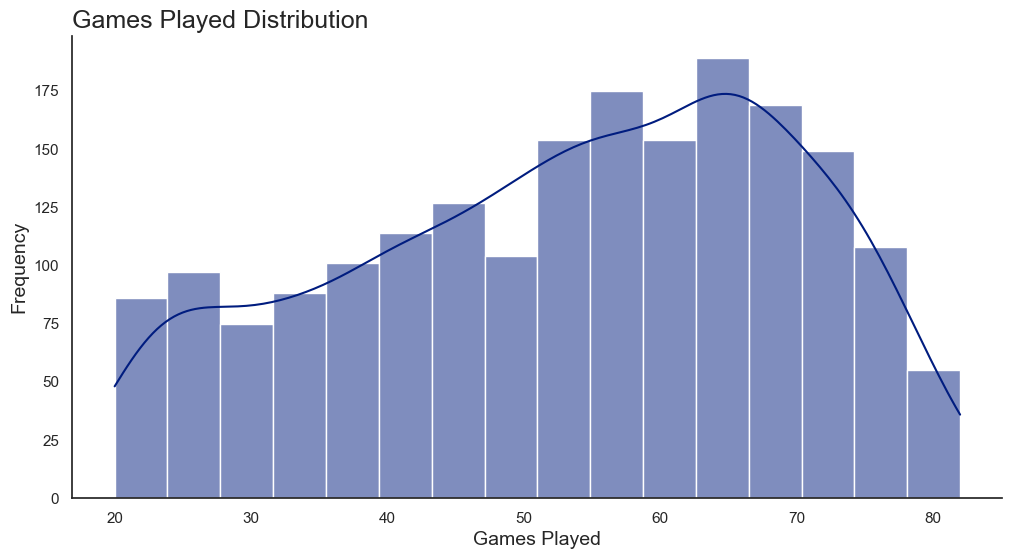

In [47]:
plot_distribution(df_players_norm_above20GP,'GP','Games Played Distribution', 'Games Played','Frequency')

## Height analysis

In [48]:
df_players_norm_above20GP[['PLAYER_HEIGHT_METERS']].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
PLAYER_HEIGHT_METERS,1945.0,1.973143,0.08875,1.575,1.775,1.85,1.9,1.975,2.05,2.075,2.15,2.275


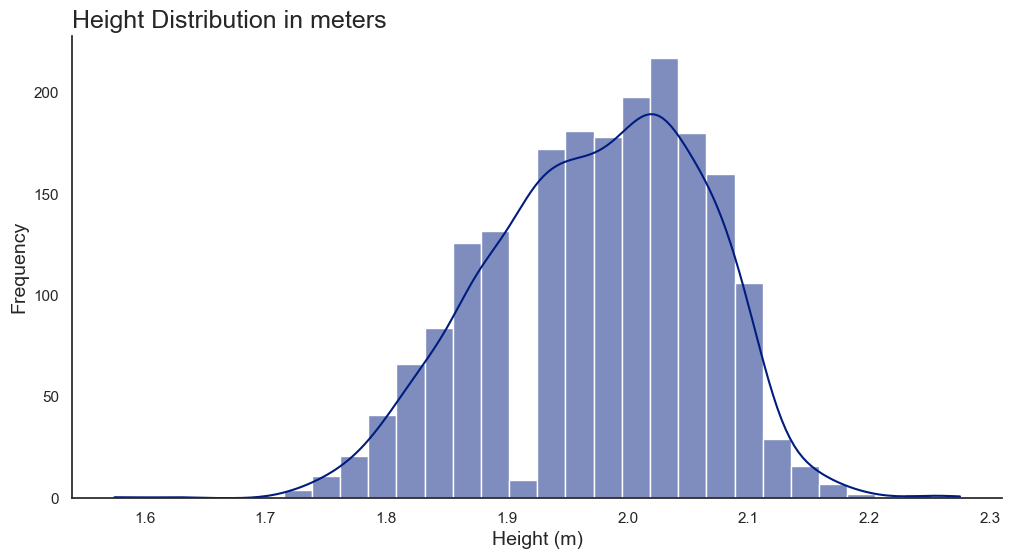

In [49]:
plot_distribution(df_players_norm_above20GP,'PLAYER_HEIGHT_METERS','Height Distribution in meters', 'Height (m)','Frequency')

## Weight analysis

In [50]:
df_players_norm_above20GP[['PLAYER_WEIGHT_KG']].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
PLAYER_WEIGHT_KG,1945.0,99.918874,12.480582,60.249,74.745,83.805,90.6,99.66,108.72,115.515,129.105,151.302


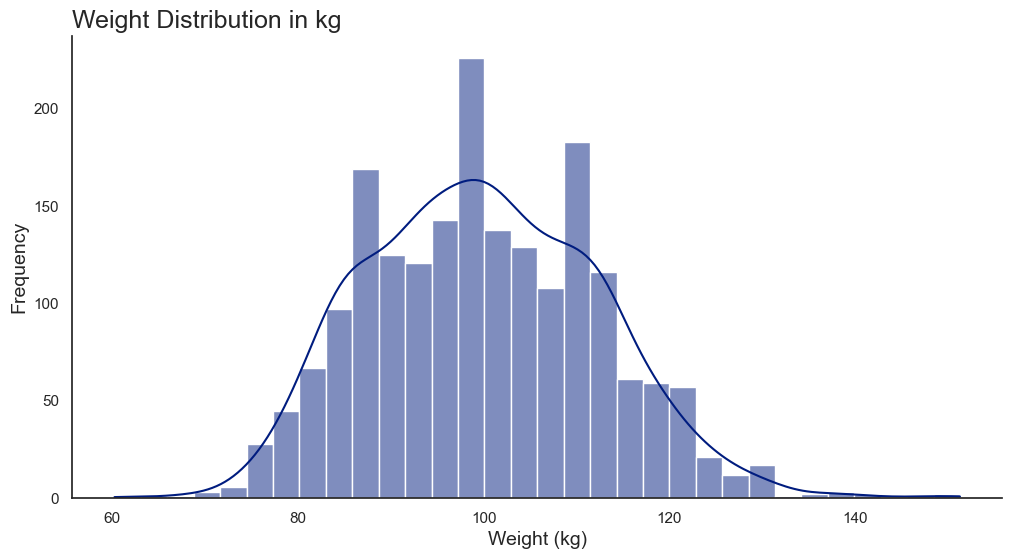

In [51]:
plot_distribution(df_players_norm_above20GP,'PLAYER_WEIGHT_KG','Weight Distribution in kg', 'Weight (kg)','Frequency')

## Analysis 1 - OFF_OVERALL

In [52]:
def plot_corr(df,x,y,title,xlabel,ylabel):
    print(f'Correlation: {round(df[y].corr(df[x]),3)}')
    ax = sns.scatterplot(x=x, y=y, data=df)
    ax.figure.set_size_inches(12,6)
    ax.set_title(title, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax=ax

In [53]:
df_players_norm_above20GP.iloc[:,1:].corr()

,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_HEIGHT_METERS,1.000000,0.814828,-0.017067,-0.058438,0.361297,-0.404289,0.022745,0.696417,0.712084,-0.156202,0.155006,-0.684428,0.150859,-0.338529,0.720204
PLAYER_WEIGHT_KG,0.814828,1.000000,0.012948,-0.028254,0.377888,-0.339164,0.047216,0.706796,0.686420,-0.094823,0.149471,-0.594967,0.209532,-0.267663,0.720131
GP,-0.017067,0.012948,1.000000,0.695857,0.648408,0.545868,0.377812,-0.094991,0.038073,0.225645,0.276112,0.162488,0.578334,0.563299,0.186358
PTS,-0.058438,-0.028254,0.695857,1.000000,0.701596,0.726536,0.370941,-0.170478,0.062669,0.643150,0.368618,0.314042,0.822484,0.862920,0.179513
REB,0.361297,0.377888,0.648408,0.701596,1.000000,0.357506,0.347713,0.341188,0.572928,0.277967,0.367534,-0.057513,0.819654,0.472872,0.714377
AST,-0.404289,-0.339164,0.545868,0.726536,0.357506,1.000000,0.304100,-0.375047,-0.206352,0.444221,0.169683,0.750280,0.657685,0.891081,-0.134604
NET_RATING,0.022745,0.047216,0.377812,0.370941,0.347713,0.304100,1.000000,0.030326,0.071238,0.065564,0.371506,0.073956,0.469345,0.452878,0.157139
OREB_PCT,0.696417,0.706796,-0.094991,-0.170478,0.341188,-0.375047,0.030326,1.000000,0.747152,-0.205584,0.160168,-0.548596,0.242552,-0.332783,0.865350
DREB_PCT,0.712084,0.686420,0.038073,0.062669,0.572928,-0.206352,0.071238,0.747152,1.000000,-0.047670,0.246397,-0.442805,0.450813,-0.126932,0.928302
USG_PCT,-0.156202,-0.094823,0.225645,0.643150,0.277967,0.444221,0.065564,-0.205584,-0.047670,1.000000,0.050654,0.380561,0.553310,0.682639,-0.020517


In [54]:
df_players_norm_above20GP.columns

Index(['PLAYER_NAME', 'PLAYER_HEIGHT_METERS', 'PLAYER_WEIGHT_KG', 'GP', 'PTS',
       'REB', 'AST', 'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT', 'TS_PCT',
       'AST_PCT', 'OVERALL_RATING', 'OVERALL_OFF', 'OVERALL_DEF'],
      dtype='object')

In [55]:
corr = df_players_norm_above20GP[['PLAYER_HEIGHT_METERS', 'PLAYER_WEIGHT_KG', 'GP', 'OVERALL_RATING', 'OVERALL_OFF', 'OVERALL_DEF']].corr()

matrix = np.triu(corr)

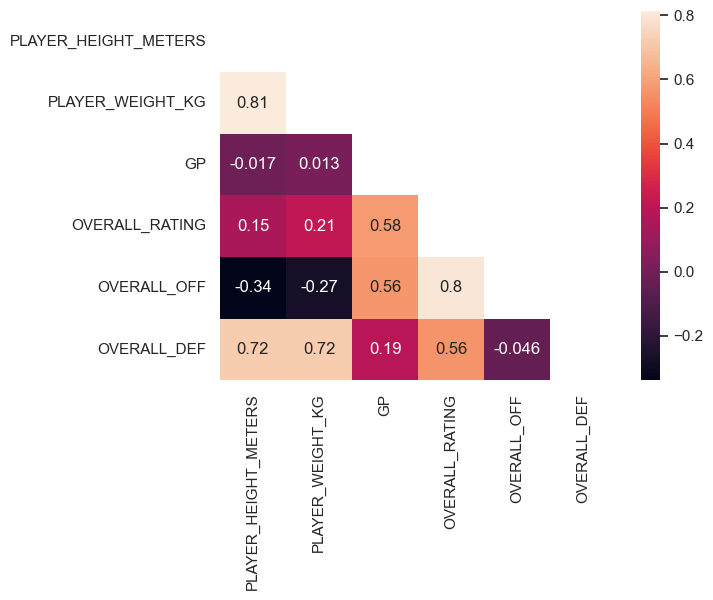

In [56]:
ax = sns.heatmap(corr, annot=True, mask=matrix)

### Height Distribution

Correlation: -0.339


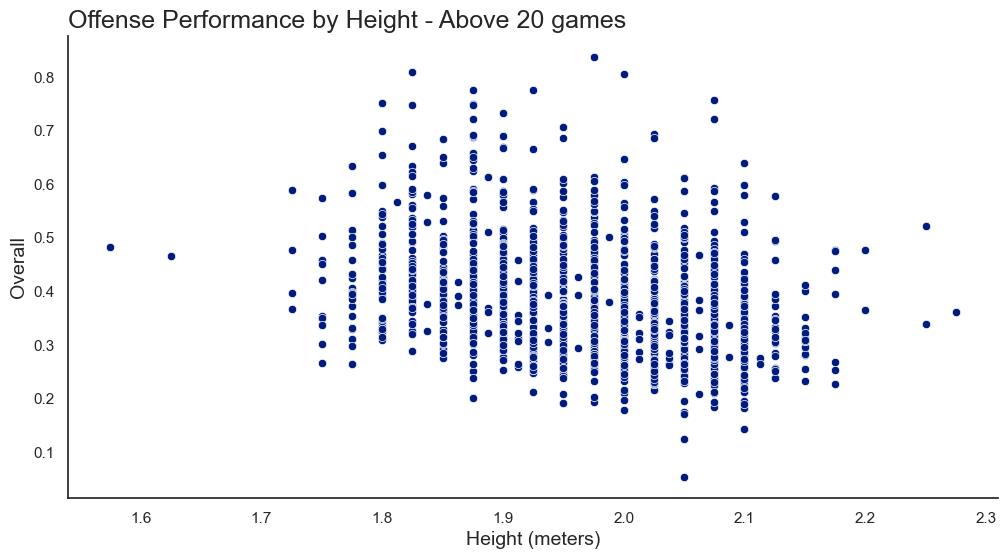

In [57]:
plot_corr(df_players_norm_above20GP,'PLAYER_HEIGHT_METERS','OVERALL_OFF','Offense Performance by Height - Above 20 games','Height (meters)','Overall')

### Weight Distribution

Correlation: -0.268


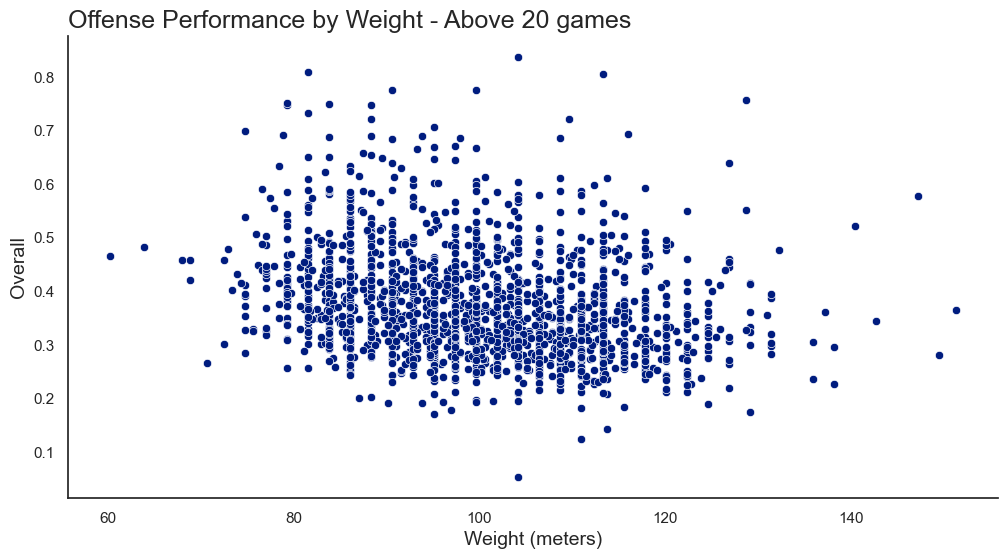

In [58]:
plot_corr(df_players_norm_above20GP,'PLAYER_WEIGHT_KG','OVERALL_OFF','Offense Performance by Weight - Above 20 games','Weight (meters)','Overall')

## Analysis 2 - DEF_OVERALL

### Height Distribution

Correlation: 0.72


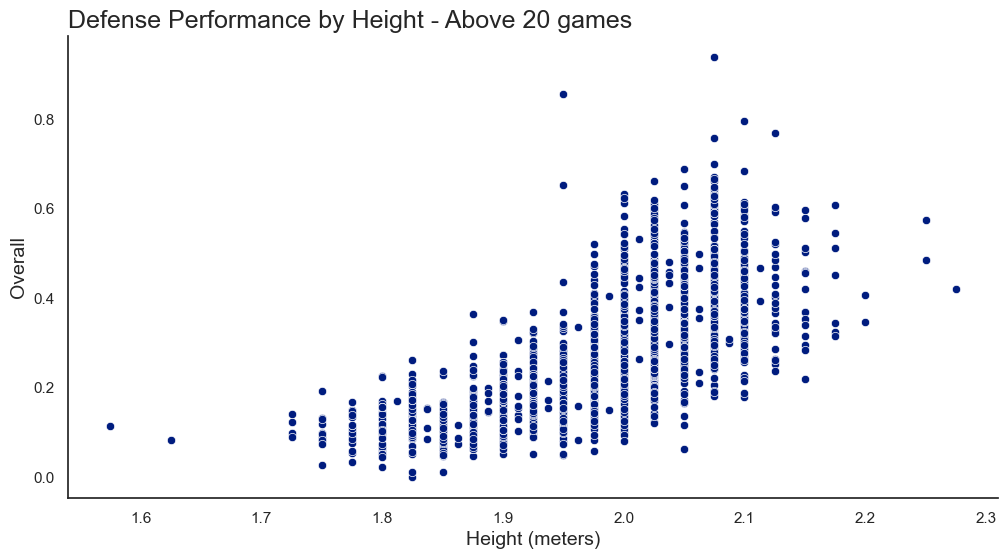

In [59]:
plot_corr(df_players_norm_above20GP,'PLAYER_HEIGHT_METERS','OVERALL_DEF','Defense Performance by Height - Above 20 games','Height (meters)','Overall')

### Weight Distribution

Correlation: 0.72


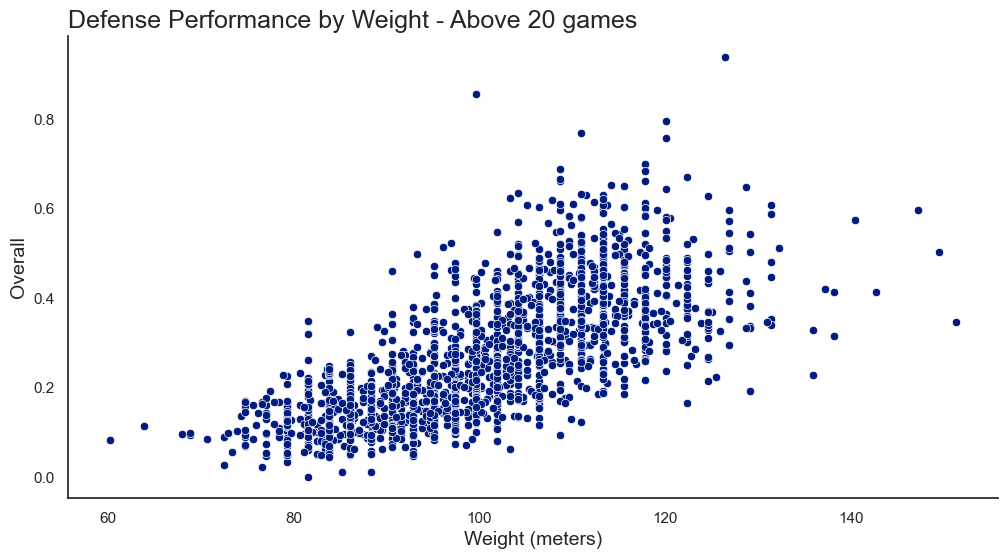

In [60]:
plot_corr(df_players_norm_above20GP,'PLAYER_WEIGHT_KG','OVERALL_DEF','Defense Performance by Weight - Above 20 games','Weight (meters)','Overall')

## Analysis 3 - OVERALL_RATING

### Height Distribution

Correlation: 0.151


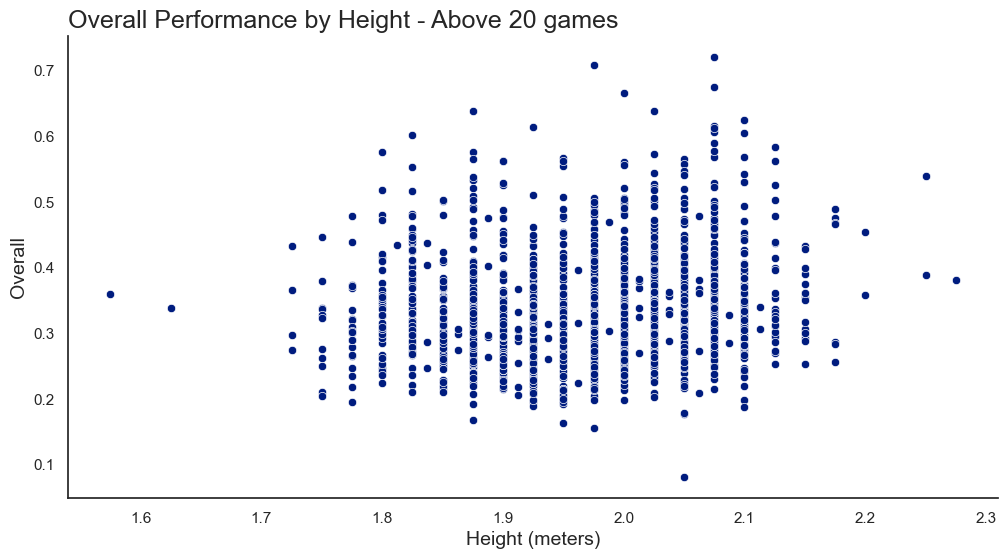

In [61]:
plot_corr(df_players_norm_above20GP,'PLAYER_HEIGHT_METERS','OVERALL_RATING','Overall Performance by Height - Above 20 games','Height (meters)','Overall')

### Weight Distribution

Correlation: 0.21


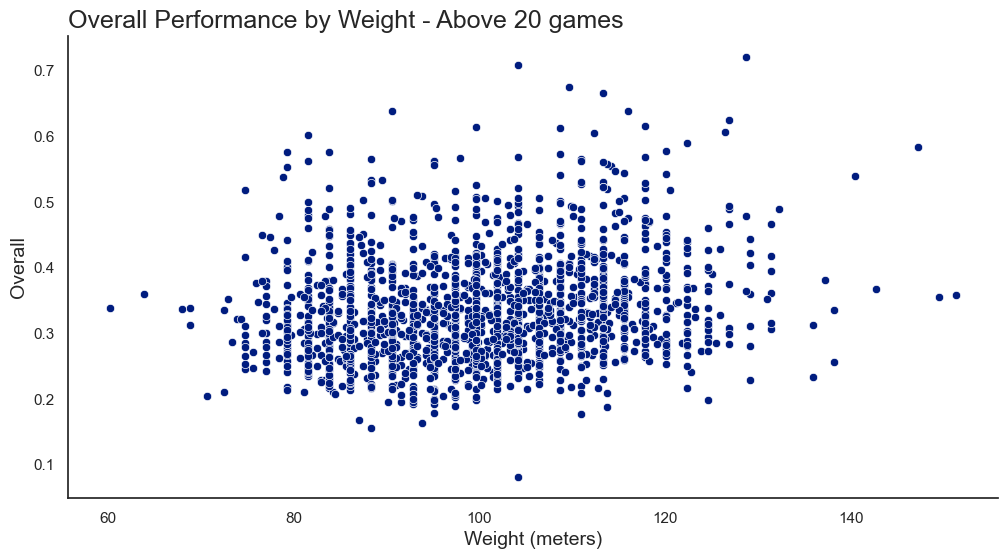

In [62]:
plot_corr(df_players_norm_above20GP,'PLAYER_WEIGHT_KG','OVERALL_RATING','Overall Performance by Weight - Above 20 games','Weight (meters)','Overall')

# **Analysis Summary**

## Normalization

To avoid disproportionately high overall rates due to few samples for constructing the median of each player's attributes, the analysis was defined only for players with over 20 games

## Analysis 1 - OFF_OVERALL

**Correlation**:

**Height**: -0.339

**Weight**: -0.268

For the offensive overall, the physical attributes influence **slightly negatively**, with height being more aggravating in this comparison.

## Analysis 2 - DEF_OVERALL

**Correlation**:

**Height**: 0.720

**Weight**: 0.720

For the defensive overall, the physical attributes influence **strongly positively**, with both of the attributes being equally significant.

## Analysis 3 - OVERALL_RATING

**Correlation**:

**Height**: 0.151

**Weight**: 0.210

For the general overall, the physical attributes influence **slightly positively**, with both of the attributes being equally weak.

## Summary

As expected, physical attributes help the player to maintain a defensive posture on the court, while slightly impairing the offensive content, as they generally make players slower and less agile to hit shots and assists.